In [ ]:

from google.colab import files


uploaded = files.upload()



Saving train.csv to train (1).csv
Saving test.csv to test (1).csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
# %matplotlib inline

#load data for train and test

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
train.shape

(700, 2)

In [ ]:
test.shape

(300, 2)

In [ ]:
#check data type of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
#check missing values with 'isnull' command
train.isnull().any()

x    False
y     True
dtype: bool

In [ ]:
#count, how many missing value is in this attributes
train['y'].isnull().sum()

1

In [ ]:
# Here,  remove Row of with missing value
train = train.dropna()

x    False
y    False
dtype: bool


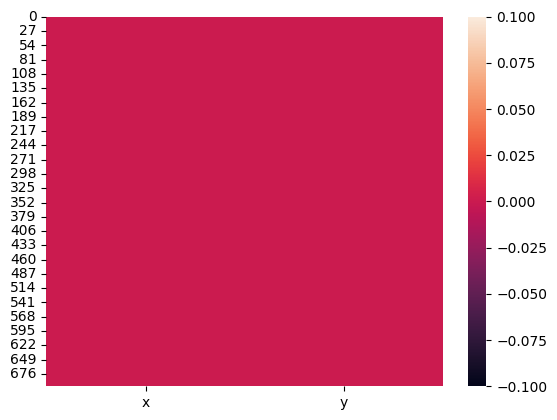

In [ ]:
#Now check there is missing value or not
print(train.isnull().any())

#plot
sb.heatmap(train.isnull())
plt.show()

In [ ]:
#describe of data into statical form
train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


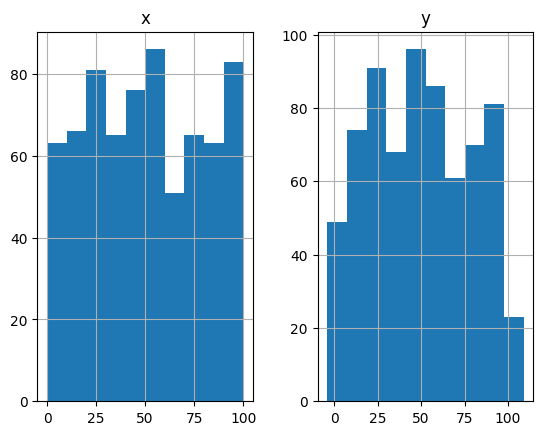

In [ ]:
#Histograme od train dataset
train.hist()
plt.show()

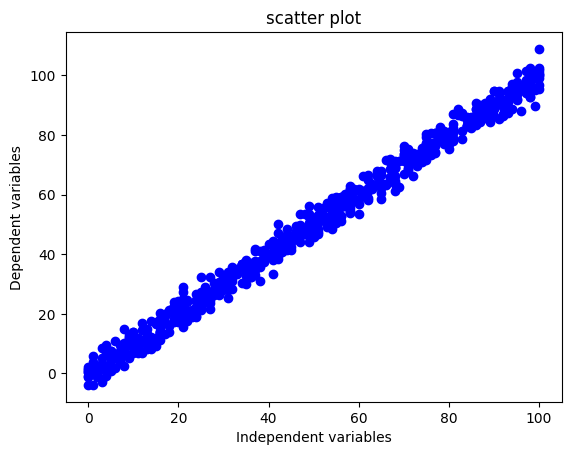

In [ ]:
#Scatter plot
plt.scatter(x=train.x, y=train.y, c='blue')
plt.title('scatter plot')
plt.xlabel('Independent variables')
plt.ylabel('Dependent variables')
plt.show()

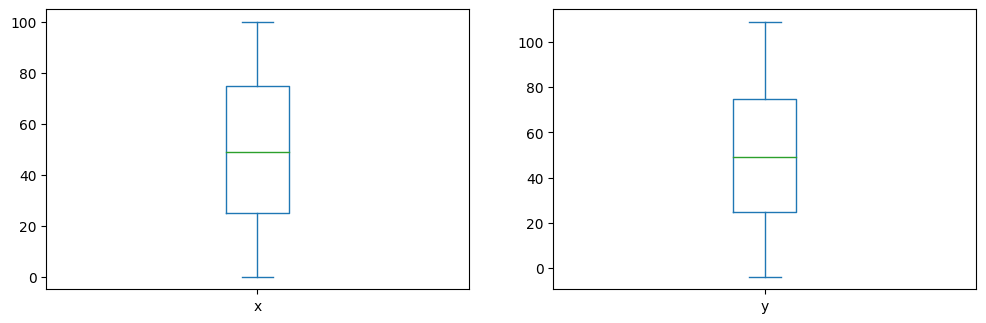

In [ ]:
#BoxPlot
train.plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 8))
plt.show()

In [ ]:
#Input Variable
X = train.x.values
#Output Variable
y = train.y.values

In [ ]:
#Calculate mean of list numbers with mean function
def mean(numbers):
    return sum(numbers) / float(len(numbers))

#Calculate varience of list numbers with varience function
def varience(numbers, mean):
    return sum([abs(x-mean)**2 for x in numbers])

In [ ]:
X_mean, y_mean = mean(X), mean(y)
X_varience = varience(X, X_mean)
y_varience = varience(y, y_mean)

In [ ]:
#Calculate the covarience of these groups
def covarience(X, X_mean, y, y_mean):
    ln = len(X)
    cov = 0.0
    for i in range(ln):
        cov += ((X[i] - X_mean) * (y[i] - y_mean))
    return cov

In [ ]:
#Lets estimate with coefficient
def coefficients():
    m = covarience(X, X_mean, y, y_mean) / varience(X, X_mean)
    b = y_mean - (m*X_mean)
    return [m,b]

In [ ]:
#Let's seprate the test datasets and reshape it
X_test = test['x'].values.reshape(-1, 1)
y_test = test['y'].values.reshape(-1, 1)

In [ ]:
# simple_linear_regression() function making here to prediction
def simple_linear_regression():
    prediction = list()
    m, c = coefficients()
    for test in X_test:
        y_pred = m*test[0] + c
        prediction.append(y_pred)
    return prediction

In [ ]:
predict = simple_linear_regression()

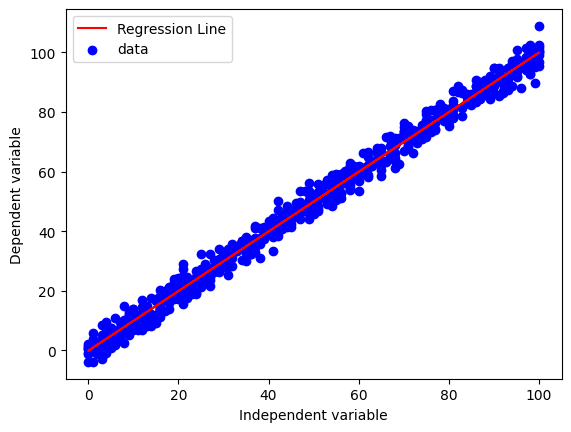

In [ ]:
# Ploting Line
plt.plot(X_test, predict, c='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, y, label='data', c='blue')

plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.legend()
plt.show()

In [ ]:
def root_mean_sqaure_error():
    rmse = 0.0
    m, c = coefficients()
    for i in range(len(X_test)):
        yhat = m*X_test[i] + c
        rmse += (y_test[i] - yhat)**2
    rmse = np.sqrt(rmse/len(X_test))
    return rmse

In [ ]:
#Root Mean Sqare Error
RMSE = root_mean_sqaure_error()
print(RMSE[0])

3.0713062680298298


In [ ]:
def r_sqaure():
    #sst is the total sum of squares and ssr is the total sum of squares of residuals
    sst = 0
    ssr = 0
    m, c = coefficients()
    for i in range(len(X_test)):
        ypred = m*X_test[i] + c
        ssr += (y_test[i] - ypred)**2
        sst += (y_test[i] - y_mean)**2
    return (1-(ssr/sst))

In [ ]:
#R-Sqaure
score = r_sqaure()
print(score[0])

0.9888226846629965
